In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
np.random.choice([1,2,3,4,5],2)#randomly generate two numbers from this list

array([3, 3])

In [0]:
#generating data sets
m1,cov1=[15,5],[[1,2],[2,1]]
m2,cov2=[27,8],[[2,-1],[-1,2]]
m3,cov3=[19,9],[[0,1],[-1,0]]
data1=np.random.multivariate_normal(m1,cov1,250)
data2=np.random.multivariate_normal(m2,cov2,150)
data3=np.random.multivariate_normal(m3,cov3,100)
X=np.vstack((data1,np.vstack((data2,data3))))  #vertical stack
np.random.shuffle(X)
X.shape

C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """
C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


(500, 2)

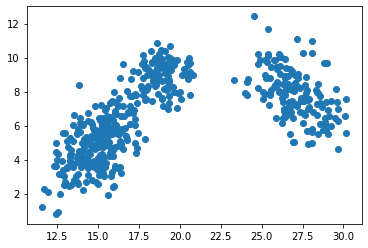

In [0]:
plt.scatter(X[:,0],X[:,-1])
plt.show()

In [0]:
def kmeans(X,k,maxIters=1000):
    m=X.shape[0] #len(X)
    centroids=X[np.random.choice(np.arange(m),k)]
    
    for i in range (maxIters):
        C=[]
        for x in X:
            distances=[]
            for c in centroids:
                d=np.dot(x-c,x-c)   #squaring of difference between x and c
                distances.append(d)
            ci=np.argmin(distances)  #index of minimum difference
            C.append(ci)
            #C=[np.argmin([np.dot(x-c,x-c) for i in centroids]) for x in X]
        C=np.asarray(C)
        centroids=[X[C==ci].mean(axis=0) for ci in range(k)]  #makes clusters
    return np.asarray(centroids),C
        

In [0]:
centroids,C=kmeans(X,k=3)
print(centroids)
print(C.shape)

[[18.62852851  8.76997389]
 [14.82133724  4.7021274 ]
 [27.01576033  7.84497147]]
(500,)


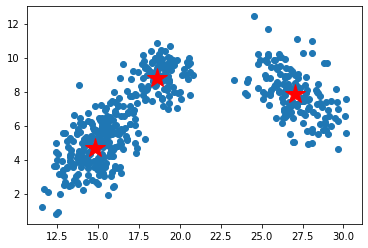

In [0]:
plt.scatter(X[:,0],X[:,-1])
plt.plot(centroids[:,0],centroids[:,-1],'r*',markersize=20)
plt.show()